**#step 1**

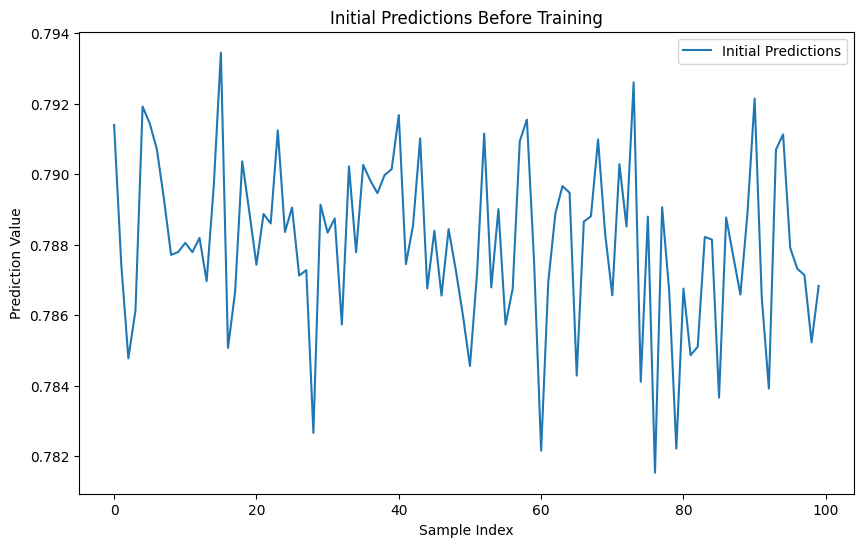

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class ManualNN(nn.Module):
    def __init__(self):
        super(ManualNN, self).__init__()
        self.w00 = torch.rand(3, 3, requires_grad=True)
        self.b00 = torch.rand(3, requires_grad=True)

        self.w10 = torch.rand(3, 3, requires_grad=True)
        self.b01 = torch.rand(3, requires_grad=True)

        self.w20 = torch.rand(3, 1, requires_grad=True)
        self.b02 = torch.rand(1, requires_grad=True)

    def forward(self, x):
        x = torch.sigmoid(x @ self.w00 + self.b00)
        x = torch.sigmoid(x @ self.w10 + self.b01)
        x = torch.tanh(x @ self.w20 + self.b02)
        return x

inputs_tensor = torch.rand(100, 3)
model = ManualNN()
with torch.no_grad():
    initial_predictions = model(inputs_tensor).numpy()

plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(len(initial_predictions)), y=initial_predictions.flatten(), label='Initial Predictions')
plt.title('Initial Predictions Before Training')
plt.xlabel('Sample Index')
plt.ylabel('Prediction Value')
plt.legend()
plt.show()


**step2**

In [15]:
optimizer = optim.SGD([model.w00, model.b00, model.w10, model.b01, model.w20, model.b02], lr=0.01)
loss_fn = nn.MSELoss()
target_outputs = (inputs_tensor.sum(dim=1, keepdim=True) / 3).numpy()
target_outputs_tensor = torch.tensor(target_outputs, dtype=torch.float32)


**step3**

In [17]:
epochs = 100
for epoch in range(epochs):
    predictions = model(inputs_tensor)
    loss = loss_fn(predictions, target_outputs_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/100], Loss: 0.0301
Epoch [20/100], Loss: 0.0294
Epoch [30/100], Loss: 0.0290
Epoch [40/100], Loss: 0.0288
Epoch [50/100], Loss: 0.0286
Epoch [60/100], Loss: 0.0286
Epoch [70/100], Loss: 0.0285
Epoch [80/100], Loss: 0.0285
Epoch [90/100], Loss: 0.0285
Epoch [100/100], Loss: 0.0285


**step4**

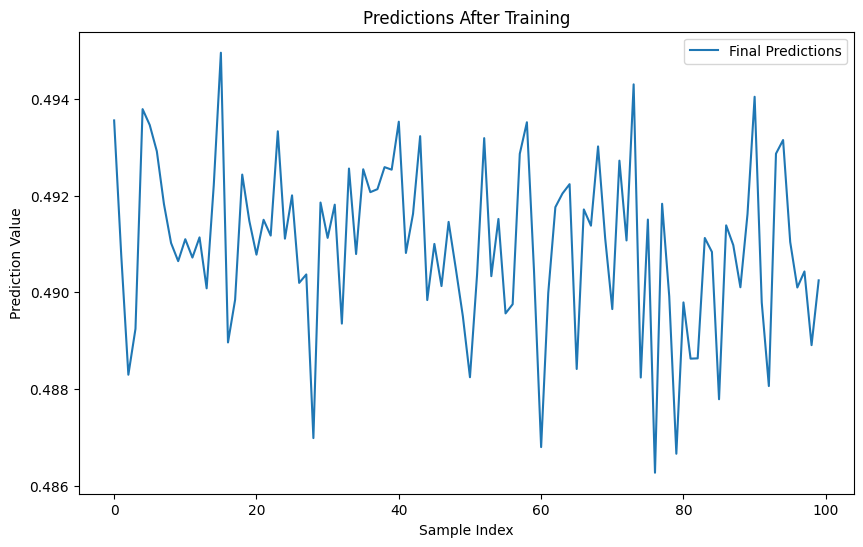

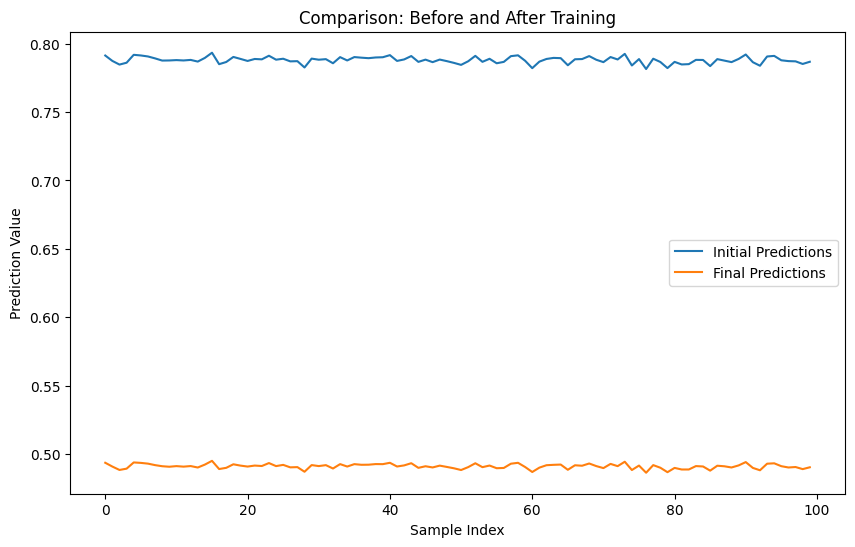

In [18]:
with torch.no_grad():
    final_predictions = model(inputs_tensor).numpy()

plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(len(final_predictions)), y=final_predictions.flatten(), label='Final Predictions')
plt.title('Predictions After Training')
plt.xlabel('Sample Index')
plt.ylabel('Prediction Value')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(len(initial_predictions)), y=initial_predictions.flatten(), label='Initial Predictions')
sns.lineplot(x=np.arange(len(final_predictions)), y=final_predictions.flatten(), label='Final Predictions')
plt.title('Comparison: Before and After Training')
plt.xlabel('Sample Index')
plt.ylabel('Prediction Value')
plt.legend()
plt.show()
